In [5]:
import keras
import matplotlib.pyplot as plt
import seaborn as sb
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, Activation, Input, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.preprocessing import sequence
from keras import layers
from keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [6]:
#load data from keras library that has been preprocessed
max_features = 10000
(x_train, y_train), (X_test, Y_test) = reuters.load_data(num_words=max_features)

In [7]:
# Data params
EMBEDDING_DIM = 100
MAX_SEQUENCE_LENGTH = 500
label_length = len(set(y_train))

# Convolution params
kernel = 7
pooling = 5
filters = 128
hidden_dims = 128

# Training params
batch = 100
epochs = 3

print(label_length)

46


In [8]:
#split data for evaluation
x_eva = X_test[:1000]
x_test = X_test[1000:]

y_eva = Y_test[:1000]
y_test = Y_test[1000:]

print(x_test.shape, x_eva.shape, y_test.shape, y_eva.shape)

(1246,) (1000,) (1246,) (1000,)


In [9]:
# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH)
x_test = sequence.pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH)
x_eva = sequence.pad_sequences(x_eva, maxlen=MAX_SEQUENCE_LENGTH)

y_train = keras.utils.to_categorical(y_train, label_length)
y_test = keras.utils.to_categorical(y_test, label_length)
y_eva = keras.utils.to_categorical(y_eva, label_length)

print('Train data size:', x_train.shape)
print('Test data size:', x_test.shape)
print(x_test.shape)

Train data size: (8982, 500)
Test data size: (1246, 500)
(1246, 500)


In [10]:
#build model
model = Sequential()
model.add(Embedding(max_features, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))

model.add(Dropout(0.5))
model.add(Conv1D(filters, kernel, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(hidden_dims))
model.add(Dropout(0.5))
model.add(Activation('relu'))

#last layer with softmax to out the probability
model.add(Dense(label_length))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 128)          89728     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
__________

In [11]:
# Train the model
history = model.fit(x_train, y_train,
         batch_size=batch,
         epochs=epochs,
         validation_data=(x_test, y_test),
         verbose=1)

Train on 8982 samples, validate on 1246 samples
Epoch 1/3
8982/8982 [==============================] - 276s 31ms/step - loss: 0.0745 - acc: 0.9801 - val_loss: 0.0601 - val_acc: 0.9841
Epoch 2/3
8982/8982 [==============================] - 273s 30ms/step - loss: 0.0555 - acc: 0.9858 - val_loss: 0.0500 - val_acc: 0.9877
Epoch 3/3
8982/8982 [==============================] - 261s 29ms/step - loss: 0.0482 - acc: 0.9881 - val_loss: 0.0466 - val_acc: 0.9886


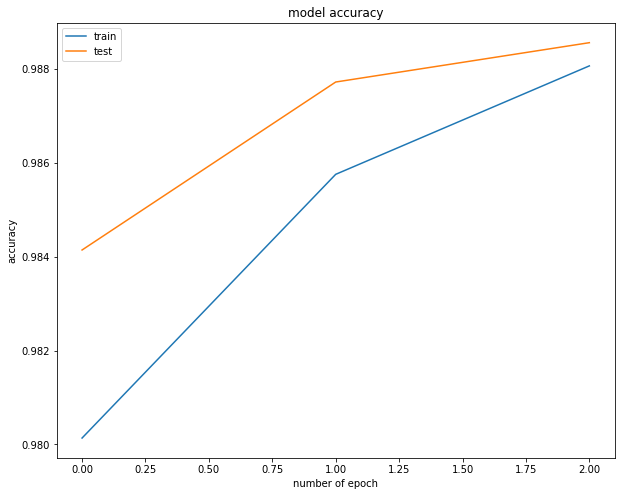

In [12]:
# summarize history for accuracy
plt.figure(figsize=(10,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('number of epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
# Evaluate model
score, acc = model.evaluate(x_eva, y_eva, batch_size=batch)
preds = model.predict_classes(x_eva, batch_size=batch)

1000/1000 [==============================] - 1s 1ms/step


In [14]:
print('Test accuracy:', acc)
print('Test score (loss):', score)

Test accuracy: 0.9884348034858703
Test score (loss): 0.045723731815814975


In [22]:
#save 
model_path = 'save_model/'
model.save(model_path + 'cnn_model.h5')
model.save_weights(model_path + 'cnn_weights.h5')